# Competition

### Submitted by: Mohammed Ihsan P, Aleena Francis, Rustham Shahan V, Alka Sherine Benny, Reuben M Sunil

## Domain-Agriculture

Mushroom Classification-:

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

## Dataset Description:
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# --PreProcessing

## 1)- Handle missing values-:

In [5]:
#check values in stalk-root column
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [6]:
#in stalk-root column the '?' represents missing values. So we have to convert it into null values
data.replace({'?': np.nan}, inplace=True)

In [7]:
data['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [8]:
#check for missing values
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [9]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
data['stalk-shape'].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [11]:
data['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [12]:
#here we will fill missing values of stalk-root column with mode, with respect to stalk-shape categories
data.loc[(data['stalk-root'].isna()) & (data['stalk-shape']=='t'),'stalk-root']=data[data['stalk-shape']=='t']['stalk-root'].mode()[0]
data.loc[(data['stalk-root'].isna()) & (data['stalk-shape']=='e'),'stalk-root']=data[data['stalk-shape']=='e']['stalk-root'].mode()[0]

In [13]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## 2)-Encoding-:

In [14]:
#one hot encoding
data1=pd.get_dummies(data[['cap-shape','cap-surface','veil-type','gill-attachment']])

#concat data frames data and data1
data=pd.concat([data,data1], axis=1)
data=data.drop(['cap-shape','cap-surface','veil-type','gill-attachment'],axis=1)

In [15]:
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,veil-type_p,gill-attachment_a,gill-attachment_f
0,p,n,t,p,c,n,k,e,e,s,...,0,0,1,0,0,1,0,1,0,1
1,e,y,t,a,c,b,k,e,c,s,...,0,0,1,0,0,1,0,1,0,1
2,e,w,t,l,c,b,n,e,c,s,...,0,0,0,0,0,1,0,1,0,1
3,p,w,t,p,c,n,n,e,e,s,...,0,0,1,0,0,0,1,1,0,1
4,e,g,f,n,w,b,k,t,e,s,...,0,0,1,0,0,1,0,1,0,1


In [16]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in data[['class','cap-color','bruises','odor','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]:
    data[i]=label_en.fit_transform(data[i])

In [17]:
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,veil-type_p,gill-attachment_a,gill-attachment_f
0,1,4,1,6,0,1,4,0,2,2,...,0,0,1,0,0,1,0,1,0,1
1,0,9,1,0,0,0,4,0,1,2,...,0,0,1,0,0,1,0,1,0,1
2,0,8,1,3,0,0,5,0,1,2,...,0,0,0,0,0,1,0,1,0,1
3,1,8,1,6,0,1,5,0,2,2,...,0,0,1,0,0,0,1,1,0,1
4,0,3,0,5,1,0,4,1,2,2,...,0,0,1,0,0,1,0,1,0,1


In [18]:
data.shape

(8124, 32)

## 3)-Feature Reduction-:

In [19]:
data.columns

Index(['class', 'cap-color', 'bruises', 'odor', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y', 'veil-type_p', 'gill-attachment_a',
       'gill-attachment_f'],
      dtype='object')

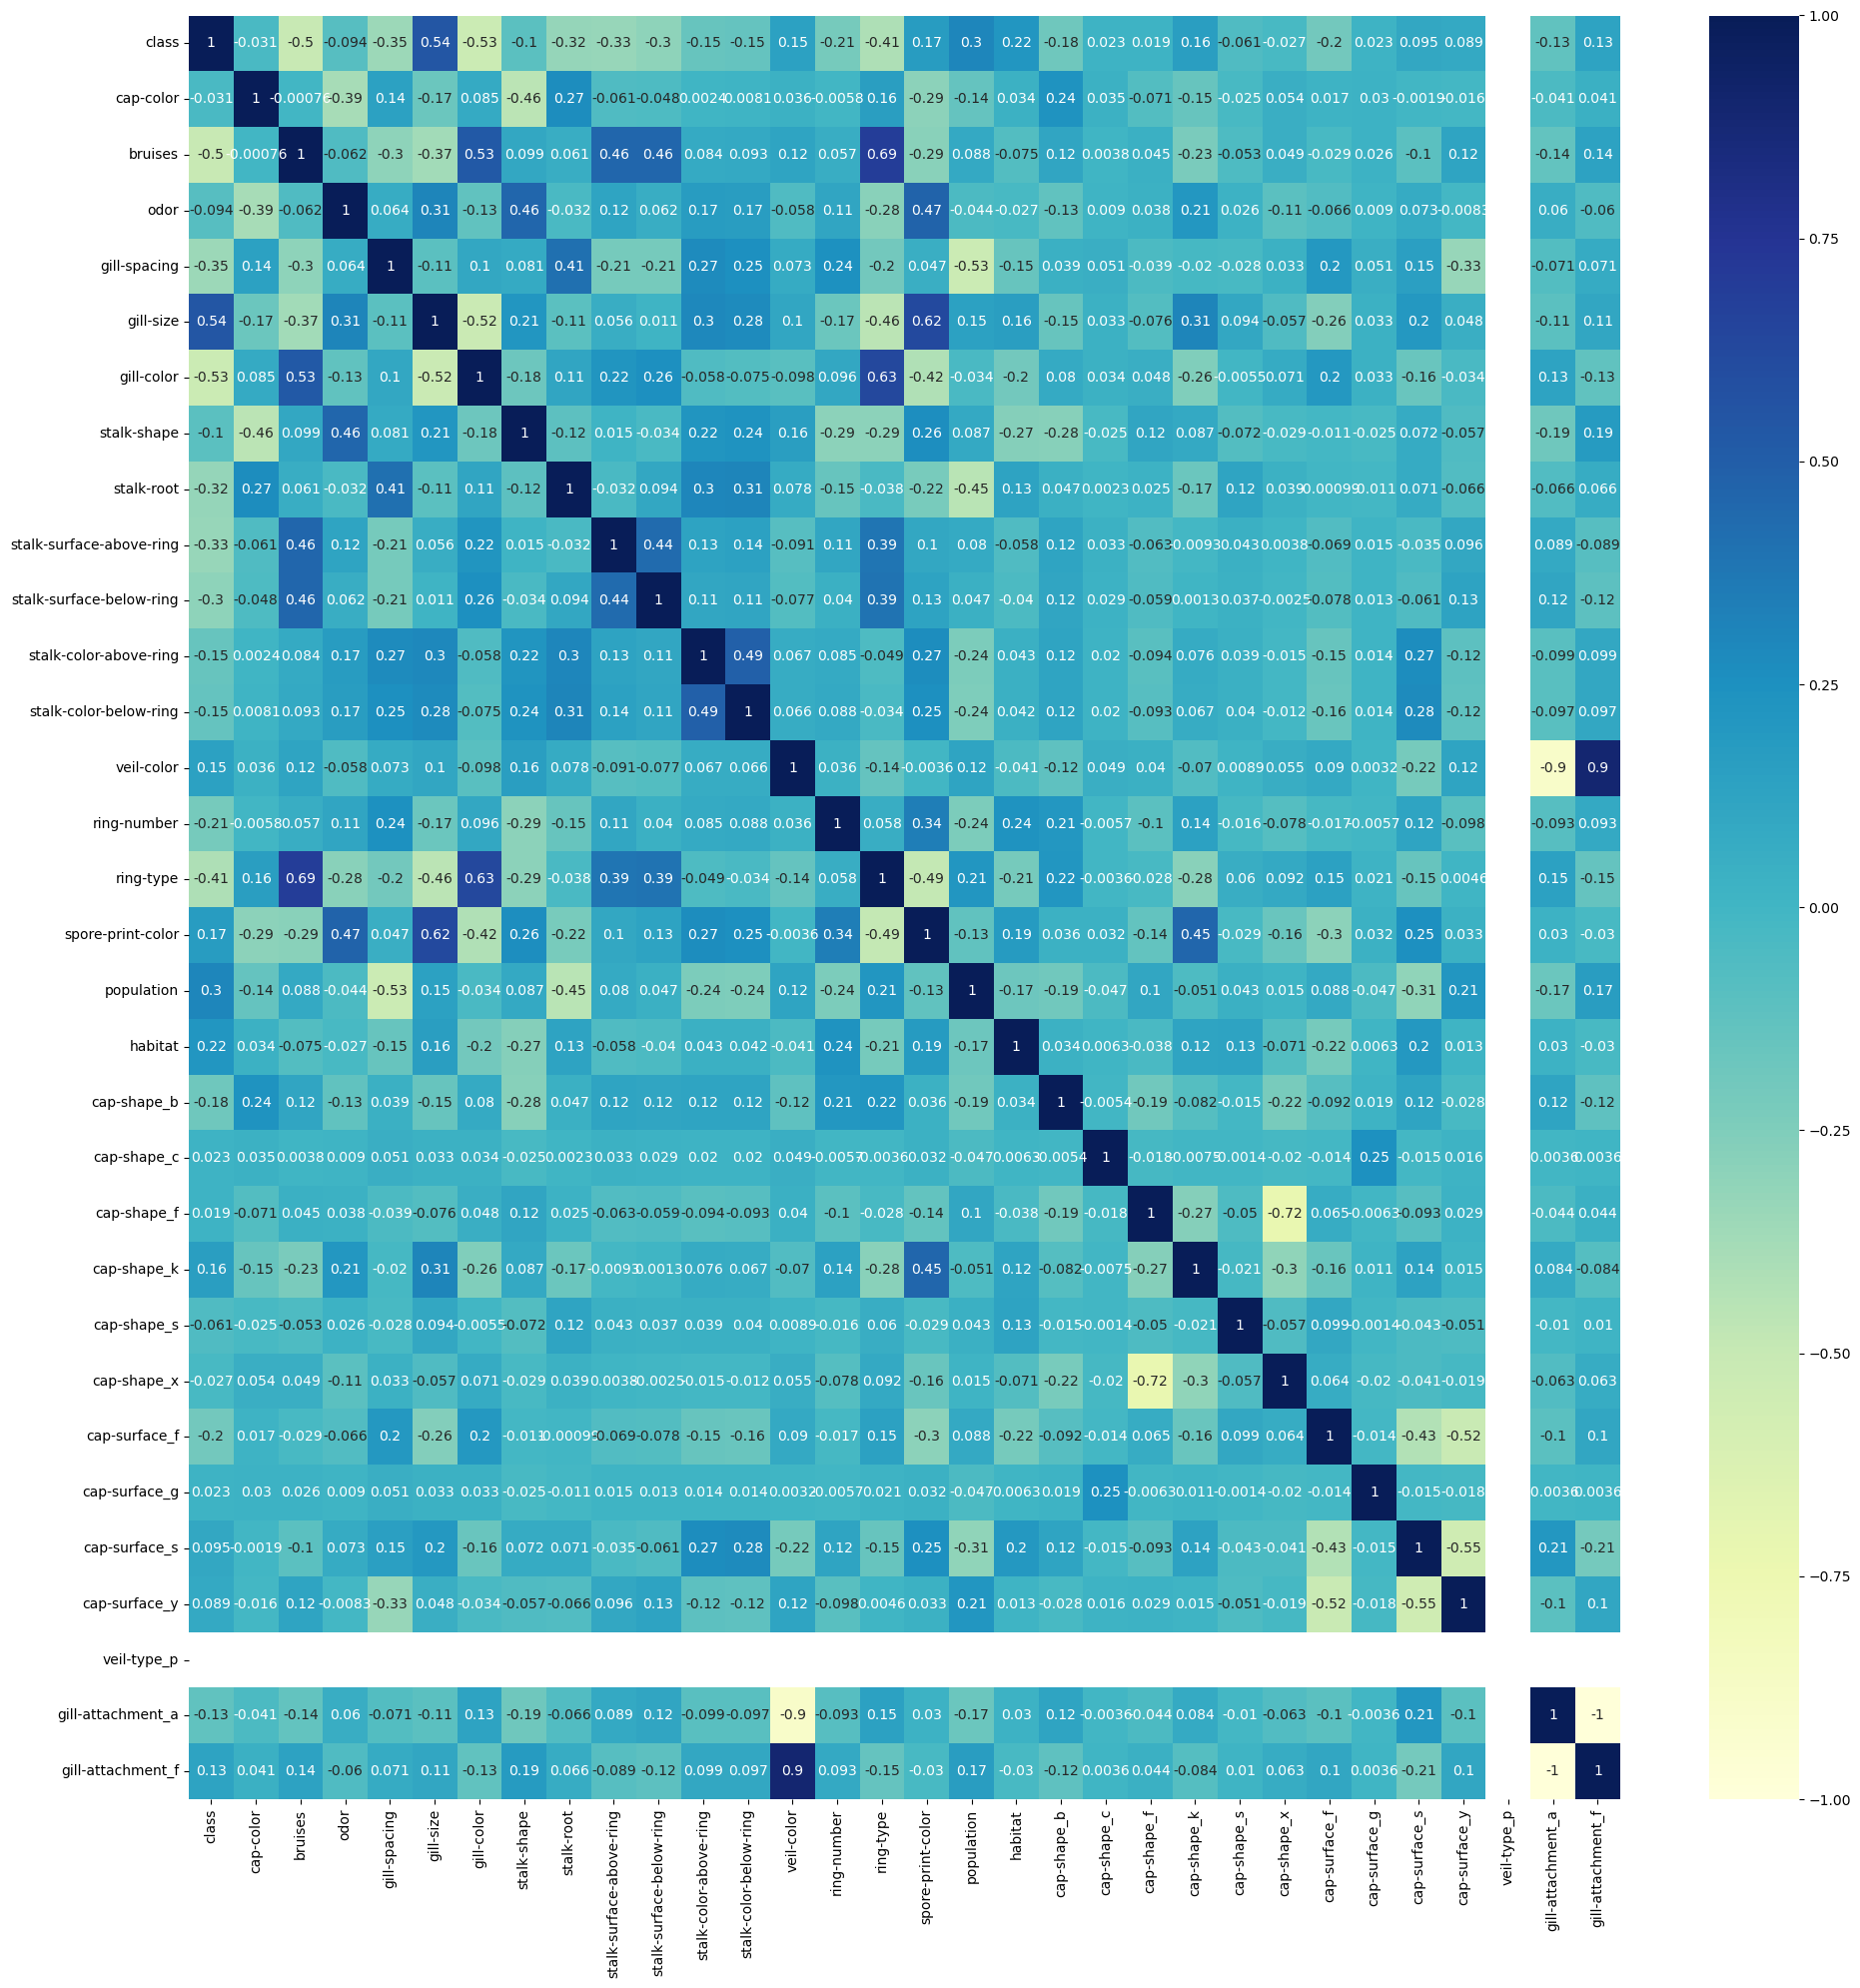

In [20]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True , cmap='YlGnBu')
plt.tight_layout()
plt.show()

gill attachment_f and gill attachment_a has strong correlation with veil color (one is strong positive and other is strong negative). So when we check the correlation between these columns and target column 'class', veil color has more correlation in both cases. Hence we could drop the other two columns.
Since veil type_P has only one value for all the rows, we could drop this also.

In [21]:
data=data.drop(['gill-attachment_f','gill-attachment_a','veil-type_p'],axis=1)

In [22]:
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,1,4,1,6,0,1,4,0,2,2,...,0,0,0,0,0,1,0,0,1,0
1,0,9,1,0,0,0,4,0,1,2,...,0,0,0,0,0,1,0,0,1,0
2,0,8,1,3,0,0,5,0,1,2,...,1,0,0,0,0,0,0,0,1,0
3,1,8,1,6,0,1,5,0,2,2,...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,5,1,0,4,1,2,2,...,0,0,0,0,0,1,0,0,1,0


# --Exploratory Data Analysis

In [23]:
data.head()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
0,1,4,1,6,0,1,4,0,2,2,...,0,0,0,0,0,1,0,0,1,0
1,0,9,1,0,0,0,4,0,1,2,...,0,0,0,0,0,1,0,0,1,0
2,0,8,1,3,0,0,5,0,1,2,...,1,0,0,0,0,0,0,0,1,0
3,1,8,1,6,0,1,5,0,2,2,...,0,0,0,0,0,1,0,0,0,1
4,0,3,0,5,1,0,4,1,2,2,...,0,0,0,0,0,1,0,0,1,0


In [24]:
data.tail()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
8119,0,4,0,5,0,0,11,0,0,2,...,0,0,0,1,0,0,0,0,1,0
8120,0,4,0,5,0,0,11,0,0,2,...,0,0,0,0,0,1,0,0,1,0
8121,0,4,0,5,0,0,5,0,0,2,...,0,0,1,0,0,0,0,0,1,0
8122,1,4,0,8,0,1,0,1,0,2,...,0,0,0,1,0,0,0,0,0,1
8123,0,4,0,5,0,0,11,0,0,2,...,0,0,0,0,0,1,0,0,1,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-color                 8124 non-null   int32
 2   bruises                   8124 non-null   int32
 3   odor                      8124 non-null   int32
 4   gill-spacing              8124 non-null   int32
 5   gill-size                 8124 non-null   int32
 6   gill-color                8124 non-null   int32
 7   stalk-shape               8124 non-null   int32
 8   stalk-root                8124 non-null   int32
 9   stalk-surface-above-ring  8124 non-null   int32
 10  stalk-surface-below-ring  8124 non-null   int32
 11  stalk-color-above-ring    8124 non-null   int32
 12  stalk-color-below-ring    8124 non-null   int32
 13  veil-color                8124 non-null   int32
 14  ring-number               8124 non-null 

In [26]:
data.shape

(8124, 29)

In [27]:
data.columns

Index(['class', 'cap-color', 'bruises', 'odor', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'cap-shape_b',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y'],
      dtype='object')

In [28]:
data.describe()

,class,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,4.504677,0.415559,4.144756,0.161497,0.309207,4.810684,0.567208,0.415066,1.575086,...,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311
std,0.499708,2.545821,0.492848,2.103729,0.368011,0.462195,3.540359,0.495493,0.812647,0.621459,...,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,5.000000,0.000000,0.000000,5.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,1.000000,5.000000,0.000000,1.000000,7.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,9.000000,1.000000,8.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x1000 with 0 Axes>

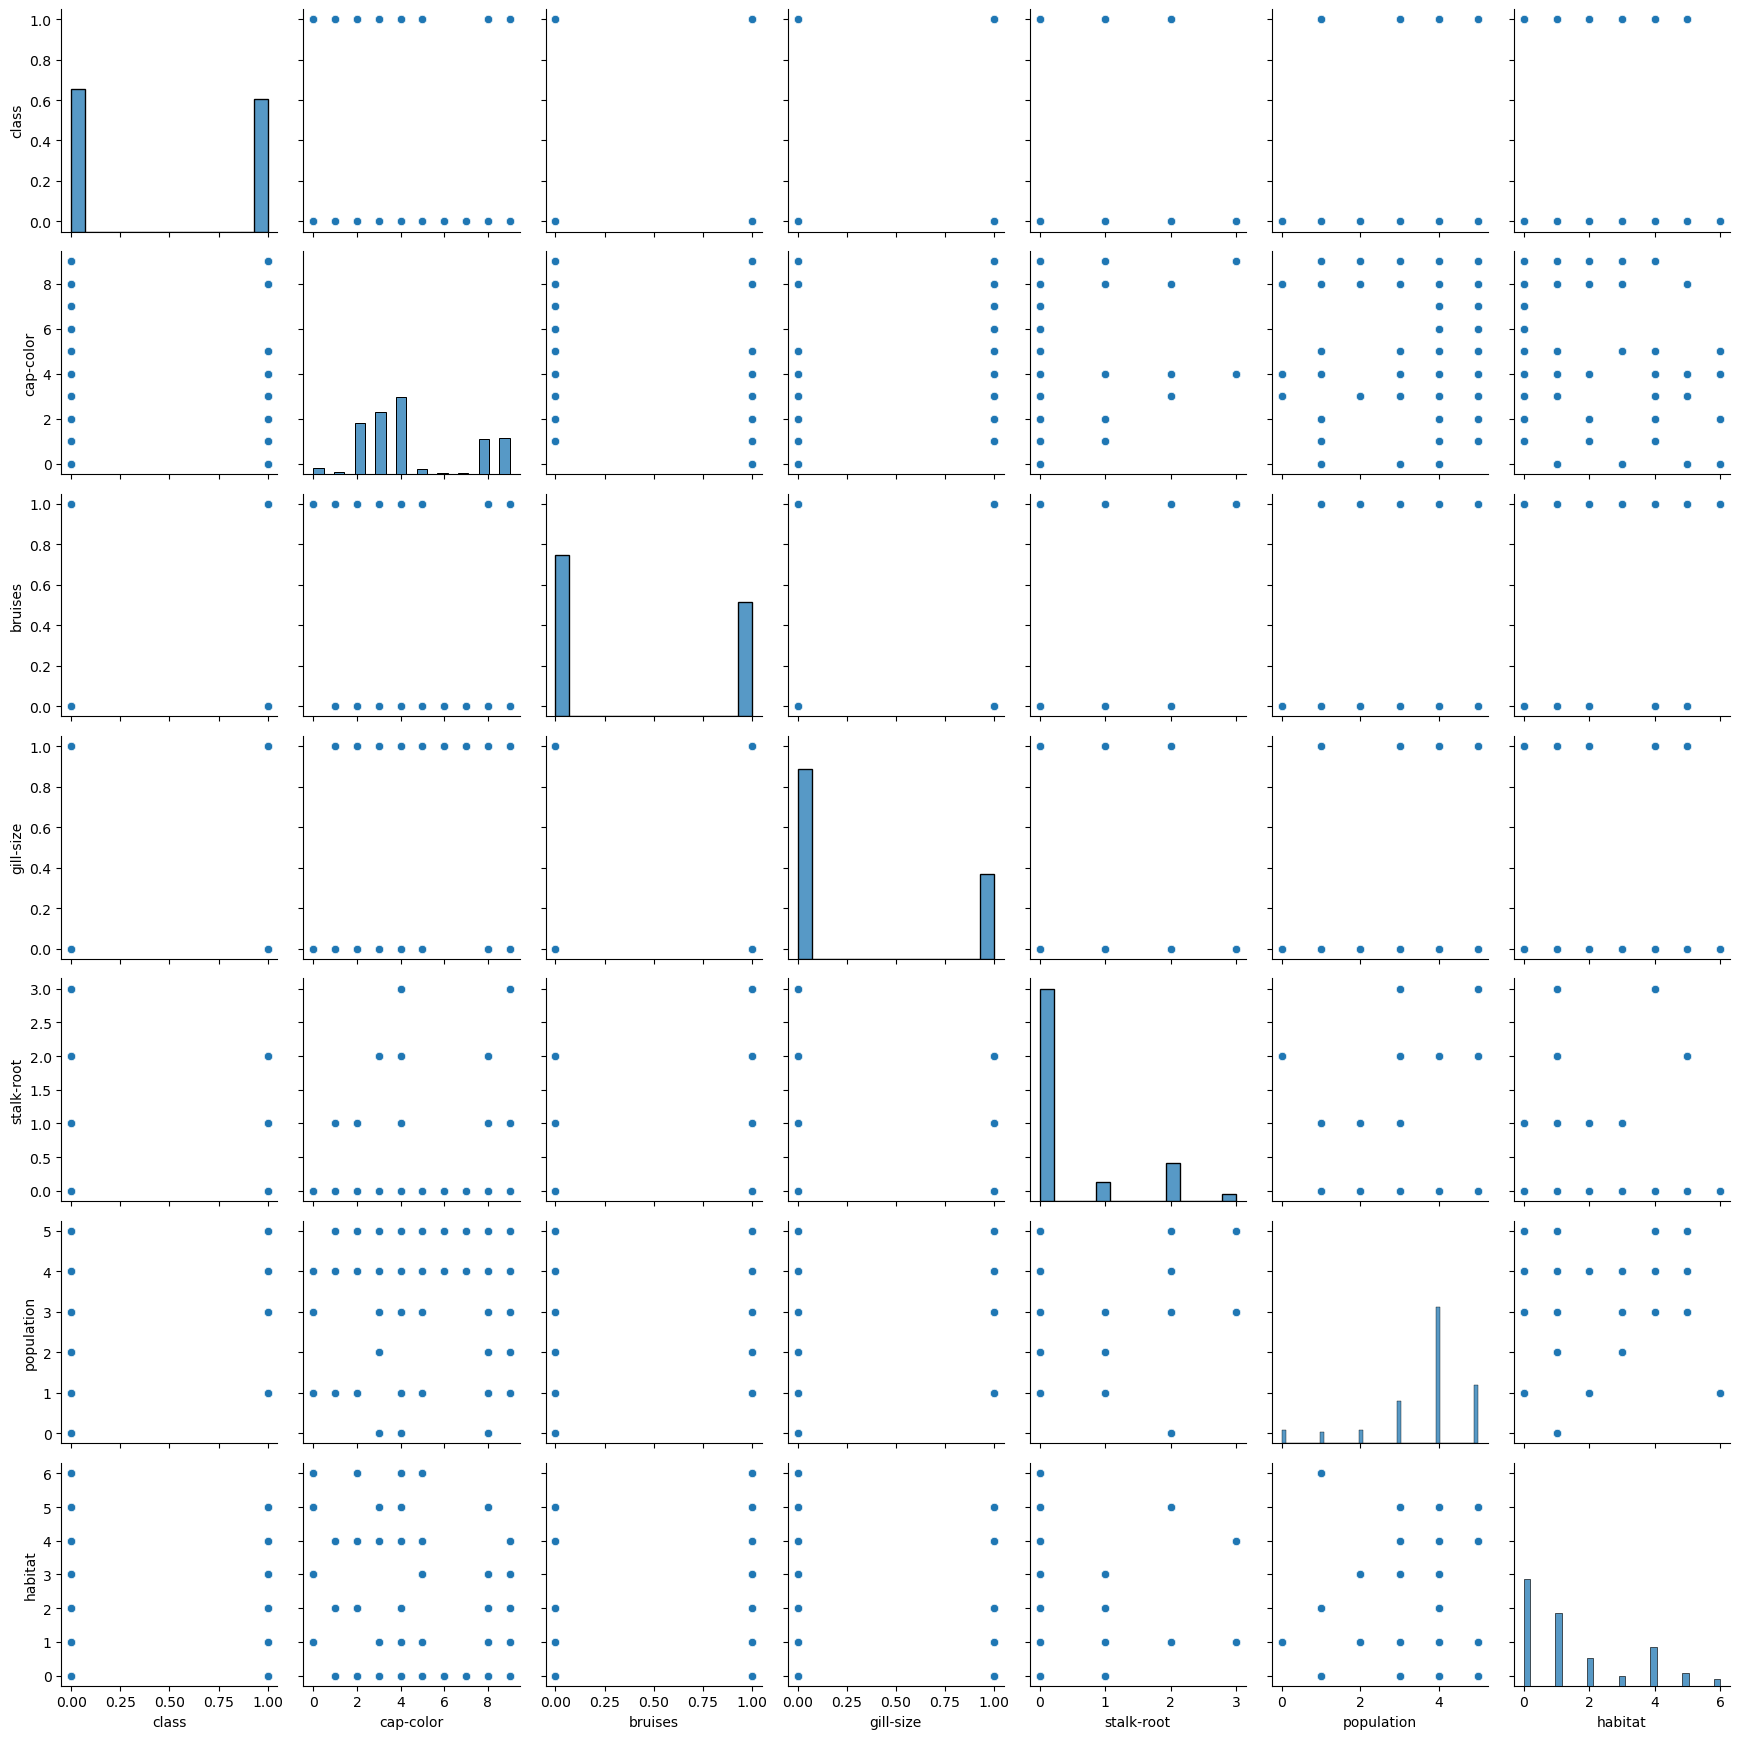

In [29]:
#pair plot
slice_data=data[['class','cap-color', 'bruises', 'gill-size','stalk-root','population', 'habitat']]
plt.figure(figsize=(10,10))
sns.pairplot(slice_data)
plt.tight_layout()
plt.show()

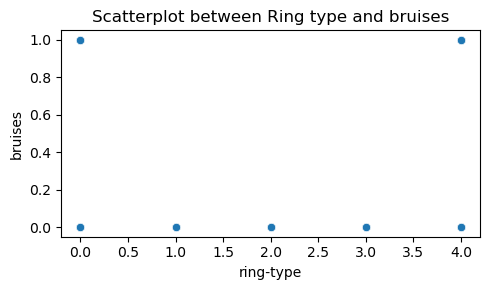

In [30]:
#scatter plot
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['ring-type'],y=data['bruises'])
plt.title('Scatterplot between Ring type and bruises')
plt.xlabel('ring-type')
plt.tight_layout()
plt.show()

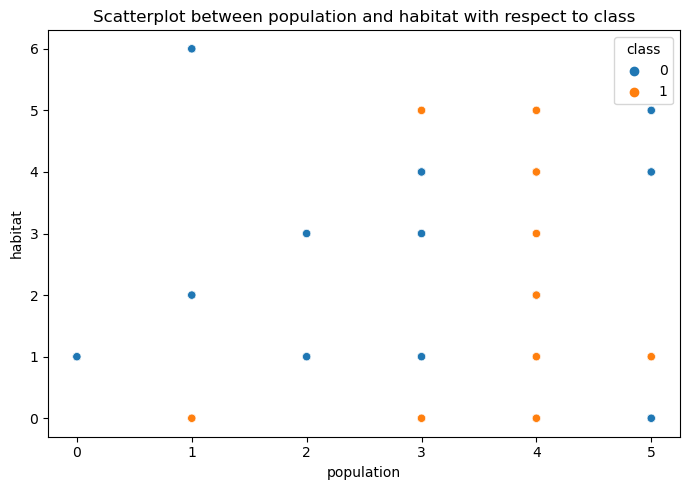

In [31]:
#scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=data['population'],y=data['habitat'], hue=data['class'])
plt.title('Scatterplot between population and habitat with respect to class')
plt.xlabel('population')
plt.tight_layout()
plt.show()

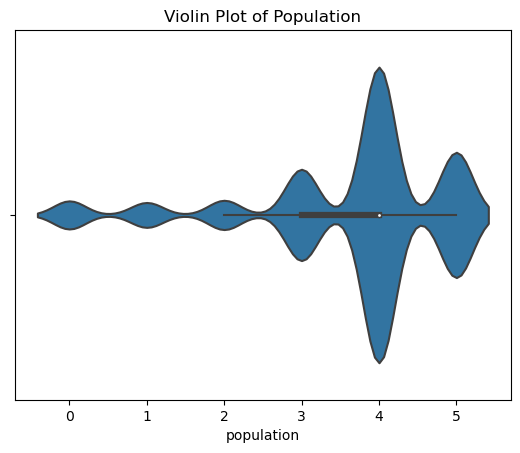

In [32]:
#violin plot
sns.violinplot(data['population'])
plt.title('Violin Plot of Population')
plt.show()

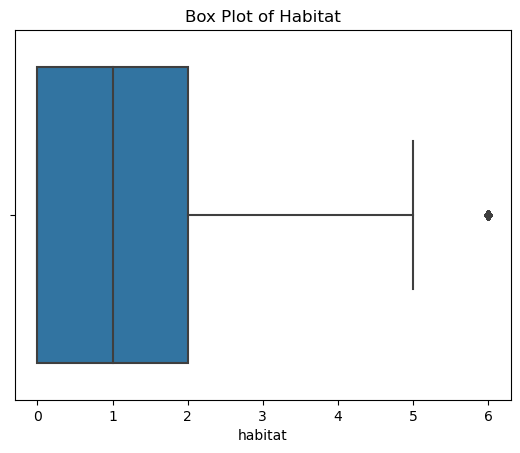

In [33]:
#boxplot
sns.boxplot(data['habitat'])
plt.title('Box Plot of Habitat')
plt.show()

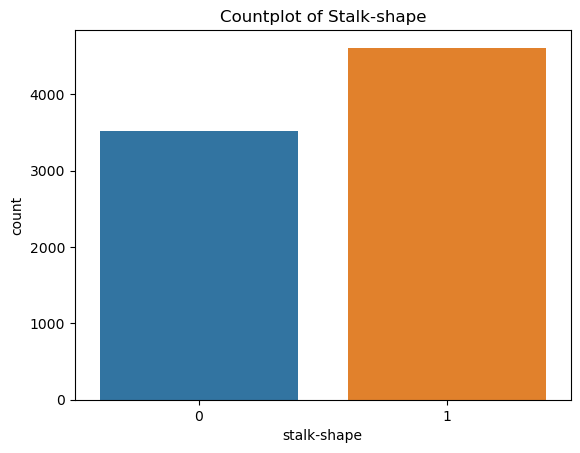

In [34]:
#countplot
sns.countplot(data['stalk-shape'])
plt.title('Countplot of Stalk-shape')
plt.show()

Here 0 corresponds to enlarging shape and 1 corresponds to tapering shape.

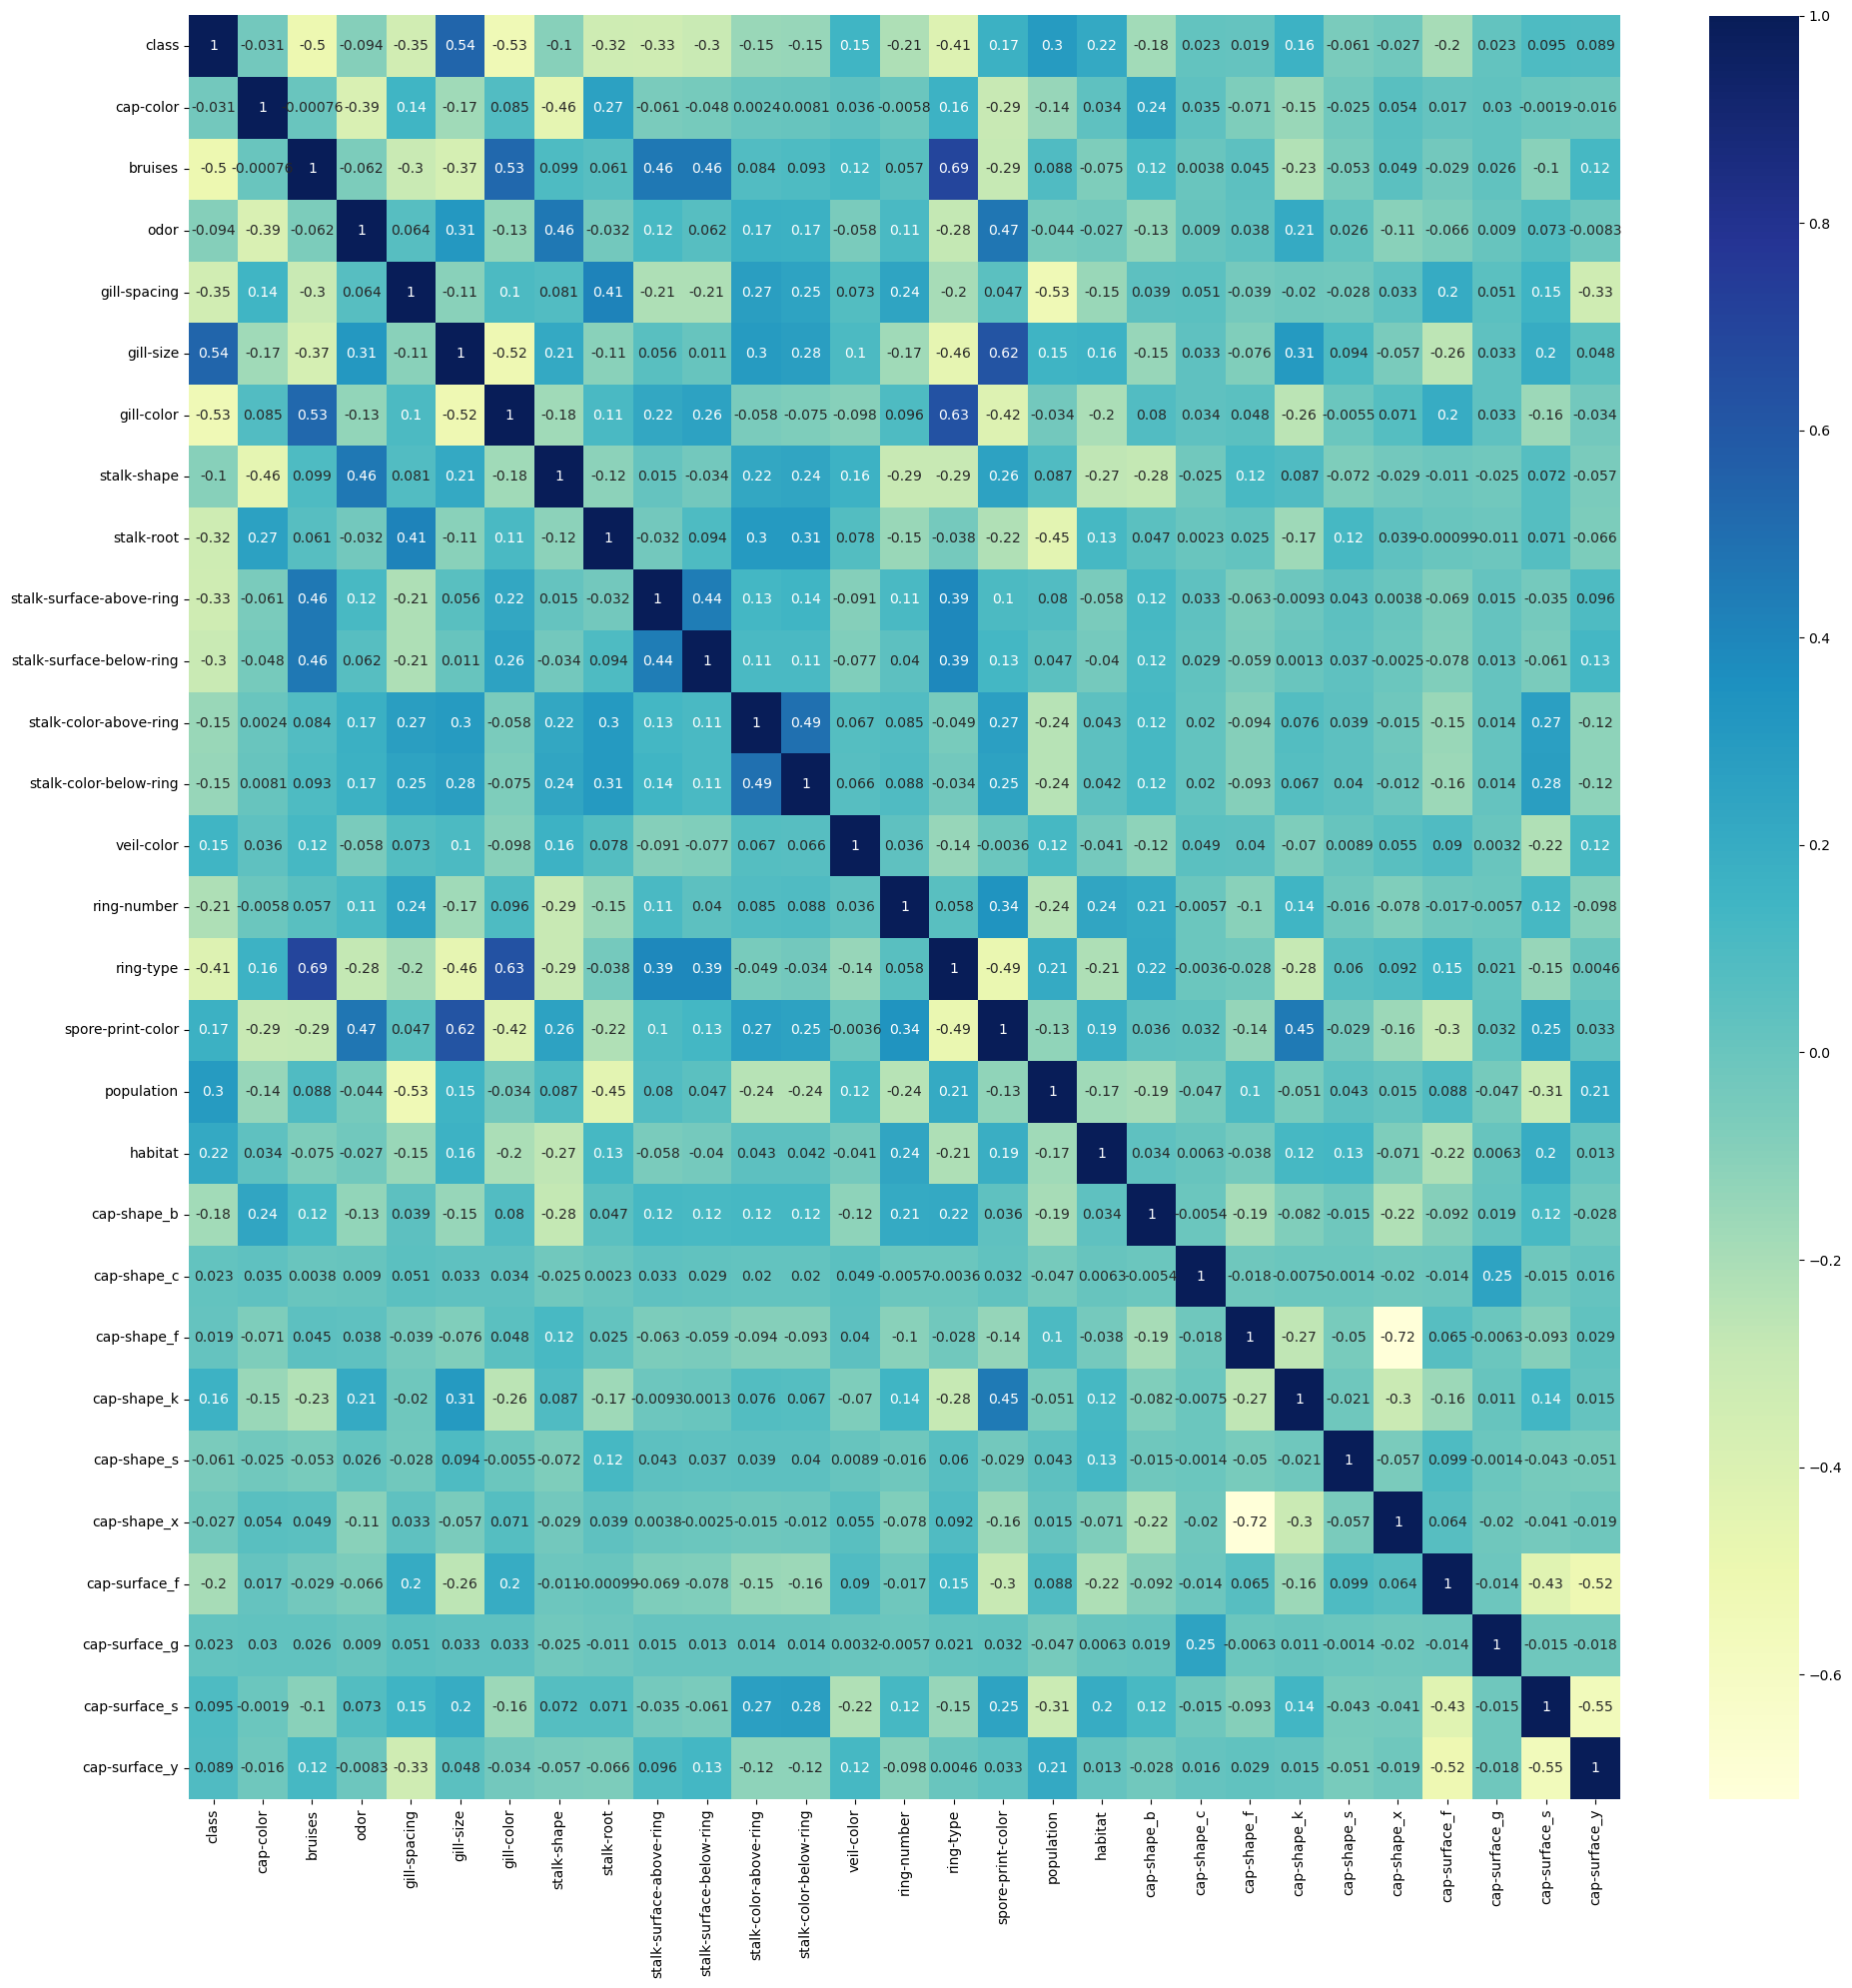

In [35]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True , cmap='YlGnBu')
plt.tight_layout()
plt.show()

Insights-:
    
* There is high positive correlation between ring-type and bruises.

* There is high negative correlation between cap-shape_f and cap-shape_x.

* There is high positive correlation between ring-type and gill color.

* There is high negative correlation between gill-spacing and population.

* There is high positive correlation between spore-print-color and gill-size.

# --Modelling

## Split the dataset

In [36]:
#split the data set into target and features
y = data['class']
x = data.drop(['class'], axis=1)

In [37]:
#split the data set into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [38]:
#check how many data points are there in the training set
x_train.shape

(5686, 28)

## 1-Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
y_predict = logit_model.predict(x_test)

In [40]:
#check the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [41]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9598031173092699
Precision is : 0.9592875318066157
Recall is : 0.9576629974597799
f1 Score is : 0.9584745762711865


In [42]:
#check confusion matrix
confusion_matrix(y_test, y_predict)

array([[1209,   48],
       [  50, 1131]], dtype=int64)

There are 98 misclassifications, we have to deal with.

## 2)-kNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
#create model with varied k values
acc_values = []
#take 3 to 15 random values for k
neighbors = np.arange(3,15)
#loop to create kNN model for each k values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_predict)
    acc_values.append(acc)

In [44]:
print(acc_values)

[1.0, 1.0, 1.0, 1.0, 0.9995898277276456, 0.9983593109105825, 0.9979491386382281, 0.9954881050041017, 0.994667760459393, 0.9950779327317474, 0.9934372436423298, 0.9934372436423298]


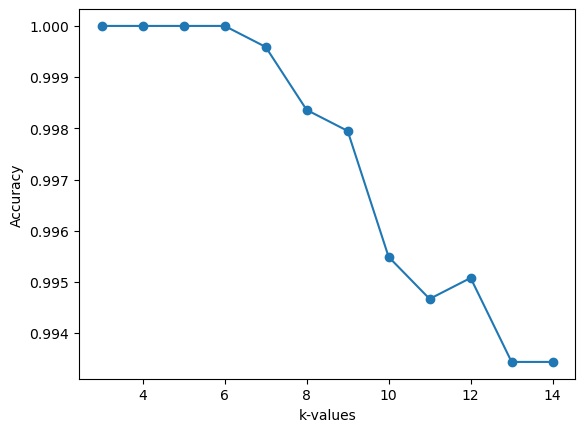

In [45]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.show()

We will take k value as 6

In [46]:
#replace k as 6
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [47]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


## 3)-SVM

### Linear SVM

In [48]:
#import library
from sklearn.svm import SVC
#create an instance of the model
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_predict = svm_linear.predict(x_test)

In [49]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9766201804757998
Precision is : 0.962171052631579
Recall is : 0.9906858594411516
f1 Score is : 0.9762202753441803


### Radial Based Function SVM

In [50]:
#import library
from sklearn.svm import SVC
#create an instance of the model
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train, y_train)
y_predict = svm_radial.predict(x_test)

In [51]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9864643150123051
Precision is : 0.9948275862068966
Recall is : 0.9771380186282811
f1 Score is : 0.9859034600598036


In [52]:
#check confusion matrix
confusion_matrix(y_test, y_predict)

array([[1251,    6],
       [  27, 1154]], dtype=int64)

There are 33 misclassifications we have to deal with.

## 4)-Desicion Tree Classifier

In [53]:
#import library
from sklearn.tree import DecisionTreeClassifier
#create an instance of the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_predict = dt_model.predict(x_test)

In [54]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


## 5)-Random Forest Classifier

In [55]:
#import libraries 
from sklearn.ensemble import RandomForestClassifier
#create the instance of the model
rf=RandomForestClassifier()
#train the data
rf.fit(x_train,y_train)
#predict x_test
y_predict=rf.predict(x_test)

In [56]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


## 6)-Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
#predict the y
y_predict=gb.predict(x_test)

In [58]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9995898277276456
Precision is : 1.0
Recall is : 0.9991532599491956
f1 Score is : 0.9995764506565015


# --Model Fine Tuning

Among the above models, kNN, Decision Tree and Random forest models have 100% accuracy, so there is no need of fine tuning. Hence we will fine tune the remaining models.

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2' ,C=5, solver='sag', max_iter=200, multi_class='auto', verbose=0, warm_start=True, n_jobs=None)
logit_model = logit_model.fit(x_train, y_train)
y_predict = logit_model.predict(x_test)

In [60]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.965135356849877
Precision is : 0.959731543624161
Recall is : 0.9686706181202371
f1 Score is : 0.964180362410451


By changing the hyper parameters of the model, we increased the performance of the model

## SVM

### Linear SVM

In [61]:
#create an instance of the model
svm_linear = SVC(kernel='linear', C=2.0, max_iter=- 1 )
svm_linear.fit(x_train, y_train)
y_predict = svm_linear.predict(x_test)

In [62]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 0.9807219031993437
Precision is : 0.9617263843648208
Recall is : 1.0
f1 Score is : 0.9804898298048982


By changing the hyper parameters of the model, we increased the performance of the model

### Radial Based Function SVM

In [63]:
#create an instance of the model
svm_radial = SVC(kernel='rbf',C=2.0, max_iter=- 1, gamma='auto')
svm_radial.fit(x_train, y_train)
y_predict = svm_radial.predict(x_test)

In [64]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


By changing the hyper parameters of the model, we increased the performance of the model

## Gradient Boosting Classifier

In [65]:
gb=GradientBoostingClassifier(n_estimators=150, subsample=1, criterion='friedman_mse', min_samples_split=3)
gb.fit(x_train,y_train)
#predict the y
y_predict=gb.predict(x_test)

In [66]:
#check the performance of the model
print('Accuracy is :', accuracy_score(y_test,y_predict))
print('Precision is :', precision_score(y_test,y_predict))
print('Recall is :', recall_score(y_test,y_predict))
print('f1 Score is :', f1_score(y_test,y_predict))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 Score is : 1.0


By changing the hyper parameters of the model, we increased the performance of the model